In [27]:
from skyfield.api import load, Topos
from geopy.geocoders import Nominatim
import time
import matplotlib.pyplot as plt


# Crear un objeto geocoder de Nominatim
geolocator = Nominatim(user_agent="Seguimiento_IEEE")

# Obtener la ubicación actual basada en la dirección IP
location = geolocator.geocode("192.168.1.2")#Colocas la Ip de tu dispositivo, esta es una ip de ejemplo

# Obtener la latitud, longitud y elevación de el observador, es decir, tu maquina
latitude = location.latitude
longitude = location.longitude
elevation = location.altitude

# Imprimir los resultados
print(f"Latitud del observador: {latitude}")
print(f"Longitud del observador: {longitude}")
print("----------------------------------------------------------------")

# Cargar los datos de efemérides de satélites
satellites = load.tle_file('./Satelites.tle')# te en ceunta que debes disponer del archivo .tle con sus datos

# Nombre del satélite que deseas rastrear
satellite_name = 'CUBESAT XI-IV (CO-57)' # este nombre aparece en las especificaciones de tu archivo .tle

# Buscar el satélite con el nombre 
satellite = None
for sat in satellites:
    if sat.name.strip() == satellite_name:
        satellite = sat
        break

if satellite is not None:
    # Crear un objeto Topos para la ubicación del observador
    observatory = Topos(latitude, longitude, elevation_m=elevation)
    i=1
        # Lista para almacenar las coordenadas de la órbita
    azimuth_values  = []
    elevation_values  = []
    while i<=5:
        # Obtener el tiempo actual
        ts = load.timescale()
        t = ts.now()

        # Calcular la posición del satélite en tiempo real
        satellite_position = satellite.at(t)

        # Calcular la posición del observador en tiempo real
        observer_position = observatory.at(t)

        # Calcular la posición relativa del satélite en relación con el observador
        relative_position = satellite_position - observer_position

        # Obtener los ángulos de azimut y elevación
        azimuth, elevation, _ = relative_position.altaz()
        
    # Almacenar las coordenadas de la órbita
        azimuth_values .append(azimuth.degrees)
        elevation_values .append(elevation.degrees)

        # Imprimir los resultados
        print(f"---Posicion del satelite {satellite_name} en su seguimiento #:{i}---")
        print(f"Angulo de azimut: {azimuth.degrees} grados")
        print(f"Angulo de elevacion: {elevation.degrees} grados")
        print("---------------------------------------------------------------------")
        i+=1

        # Esperar un tiempo antes de la siguiente iteración (por ejemplo, 10 segundos)
        time.sleep(60)
else:
    print("No se encontró el satélite especificado")


Latitud del observador: 45.883055
Longitud del observador: -121.987287
----------------------------------------------------------------
---Posicion del satelite CUBESAT XI-IV (CO-57) en su seguimiento #:1---
Angulo de azimut: -29.245427208532575 grados
Angulo de elevacion: 321.5776973765685 grados
---------------------------------------------------------------------
---Posicion del satelite CUBESAT XI-IV (CO-57) en su seguimiento #:2---
Angulo de azimut: -31.158310399154985 grados
Angulo de elevacion: 319.8962487865467 grados
---------------------------------------------------------------------
---Posicion del satelite CUBESAT XI-IV (CO-57) en su seguimiento #:3---
Angulo de azimut: -33.06351976436639 grados
Angulo de elevacion: 318.29714707292254 grados
---------------------------------------------------------------------
---Posicion del satelite CUBESAT XI-IV (CO-57) en su seguimiento #:4---
Angulo de azimut: -34.96070795884604 grados
Angulo de elevacion: 316.7657304449638 grados
---

In [28]:
# Resto del código...

# Imprimir los datos guardados
print("Datos de la órbita:")
for i in range(len(azimuth_values)):
    print(f"Iteración {i+1}: Azimuth={azimuth_values[i]}, Elevation={elevation_values[i]}")


Datos de la órbita:
Iteración 1: Azimuth=-29.245427208532575, Elevation=321.5776973765685
Iteración 2: Azimuth=-31.158310399154985, Elevation=319.8962487865467
Iteración 3: Azimuth=-33.06351976436639, Elevation=318.29714707292254
Iteración 4: Azimuth=-34.96070795884604, Elevation=316.7657304449638
Iteración 5: Azimuth=-36.850149745176864, Elevation=315.2882606347626


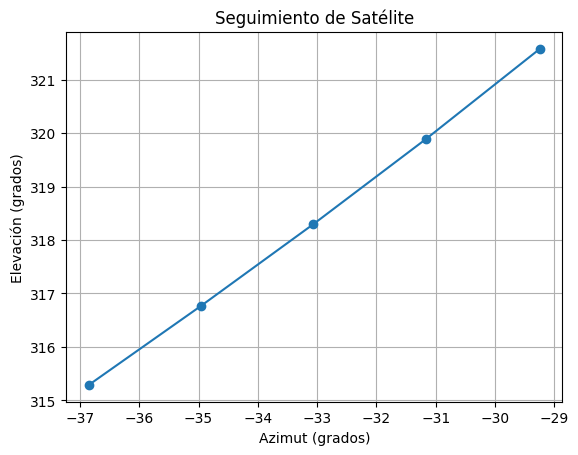

In [30]:
# Graficar los valores de azimut y elevación
plt.plot(azimuth_values, elevation_values, 'o-')

# Configurar los ejes y etiquetas
plt.xlabel('Azimut (grados)')
plt.ylabel('Elevación (grados)')
plt.title('Seguimiento de Satélite')
plt.grid()

# Mostrar la gráfica
plt.show()